In [56]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
seed = 42

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
import arviz as az
import numpy as np
import pandas as pd

import causalpy as cp

# ITS - refactored code

In [58]:
df = (
    cp.load_data("its")
    .assign(date=lambda x: pd.to_datetime(x["date"]))
    .set_index("date")
)

treatment_time = pd.to_datetime("2017-01-01")
df.head()

,month,year,t,y
date,,,,
2010-01-31,1,2010,0,25.058186
2010-02-28,2,2010,1,27.189812
2010-03-31,3,2010,2,26.487551
2010-04-30,4,2010,3,31.241716
2010-05-31,5,2010,4,40.753973


## Bayesian

In [59]:
pymc_result = cp.InterruptedTimeSeries(
    df,
    treatment_time,
    formula="y ~ 1 + t + C(month)",
    model=cp.pymc_models.LinearRegression(sample_kwargs={"random_seed": seed}),
)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
Sampling: [beta, sigma, y_hat]
Sampling: [y_hat]
Sampling: [y_hat]
Sampling: [y_hat]
Sampling: [y_hat]


In [60]:
pymc_result.summary()

==================================Pre-Post Fit==================================
Formula: y ~ 1 + t + C(month)
Model coefficients:
    Intercept       23, 94% HDI [21, 24]
    C(month)[T.2]   2.9, 94% HDI [0.88, 4.8]
    C(month)[T.3]   1.2, 94% HDI [-0.81, 3.1]
    C(month)[T.4]   7.1, 94% HDI [5.2, 9.1]
    C(month)[T.5]   15, 94% HDI [13, 17]
    C(month)[T.6]   25, 94% HDI [23, 27]
    C(month)[T.7]   18, 94% HDI [16, 20]
    C(month)[T.8]   33, 94% HDI [32, 35]
    C(month)[T.9]   16, 94% HDI [14, 18]
    C(month)[T.10]  9.2, 94% HDI [7.2, 11]
    C(month)[T.11]  6.3, 94% HDI [4.2, 8.2]
    C(month)[T.12]  0.59, 94% HDI [-1.4, 2.5]
    t               0.21, 94% HDI [0.19, 0.23]
    sigma           2, 94% HDI [1.7, 2.3]


In [61]:
pymc_result.print_coefficients()

Model coefficients:
    Intercept       23, 94% HDI [21, 24]
    C(month)[T.2]   2.9, 94% HDI [0.88, 4.8]
    C(month)[T.3]   1.2, 94% HDI [-0.81, 3.1]
    C(month)[T.4]   7.1, 94% HDI [5.2, 9.1]
    C(month)[T.5]   15, 94% HDI [13, 17]
    C(month)[T.6]   25, 94% HDI [23, 27]
    C(month)[T.7]   18, 94% HDI [16, 20]
    C(month)[T.8]   33, 94% HDI [32, 35]
    C(month)[T.9]   16, 94% HDI [14, 18]
    C(month)[T.10]  9.2, 94% HDI [7.2, 11]
    C(month)[T.11]  6.3, 94% HDI [4.2, 8.2]
    C(month)[T.12]  0.59, 94% HDI [-1.4, 2.5]
    t               0.21, 94% HDI [0.19, 0.23]
    sigma           2, 94% HDI [1.7, 2.3]


(<Figure size 700x800 with 3 Axes>,
 array([<Axes: title={'center': '\n            Pre-intervention Bayesian $R^2$: 0.95\n            (std = 0.0086)\n            '}>,
        <Axes: title={'center': 'Causal Impact'}>,
        <Axes: title={'center': 'Cumulative Causal Impact'}>], dtype=object))

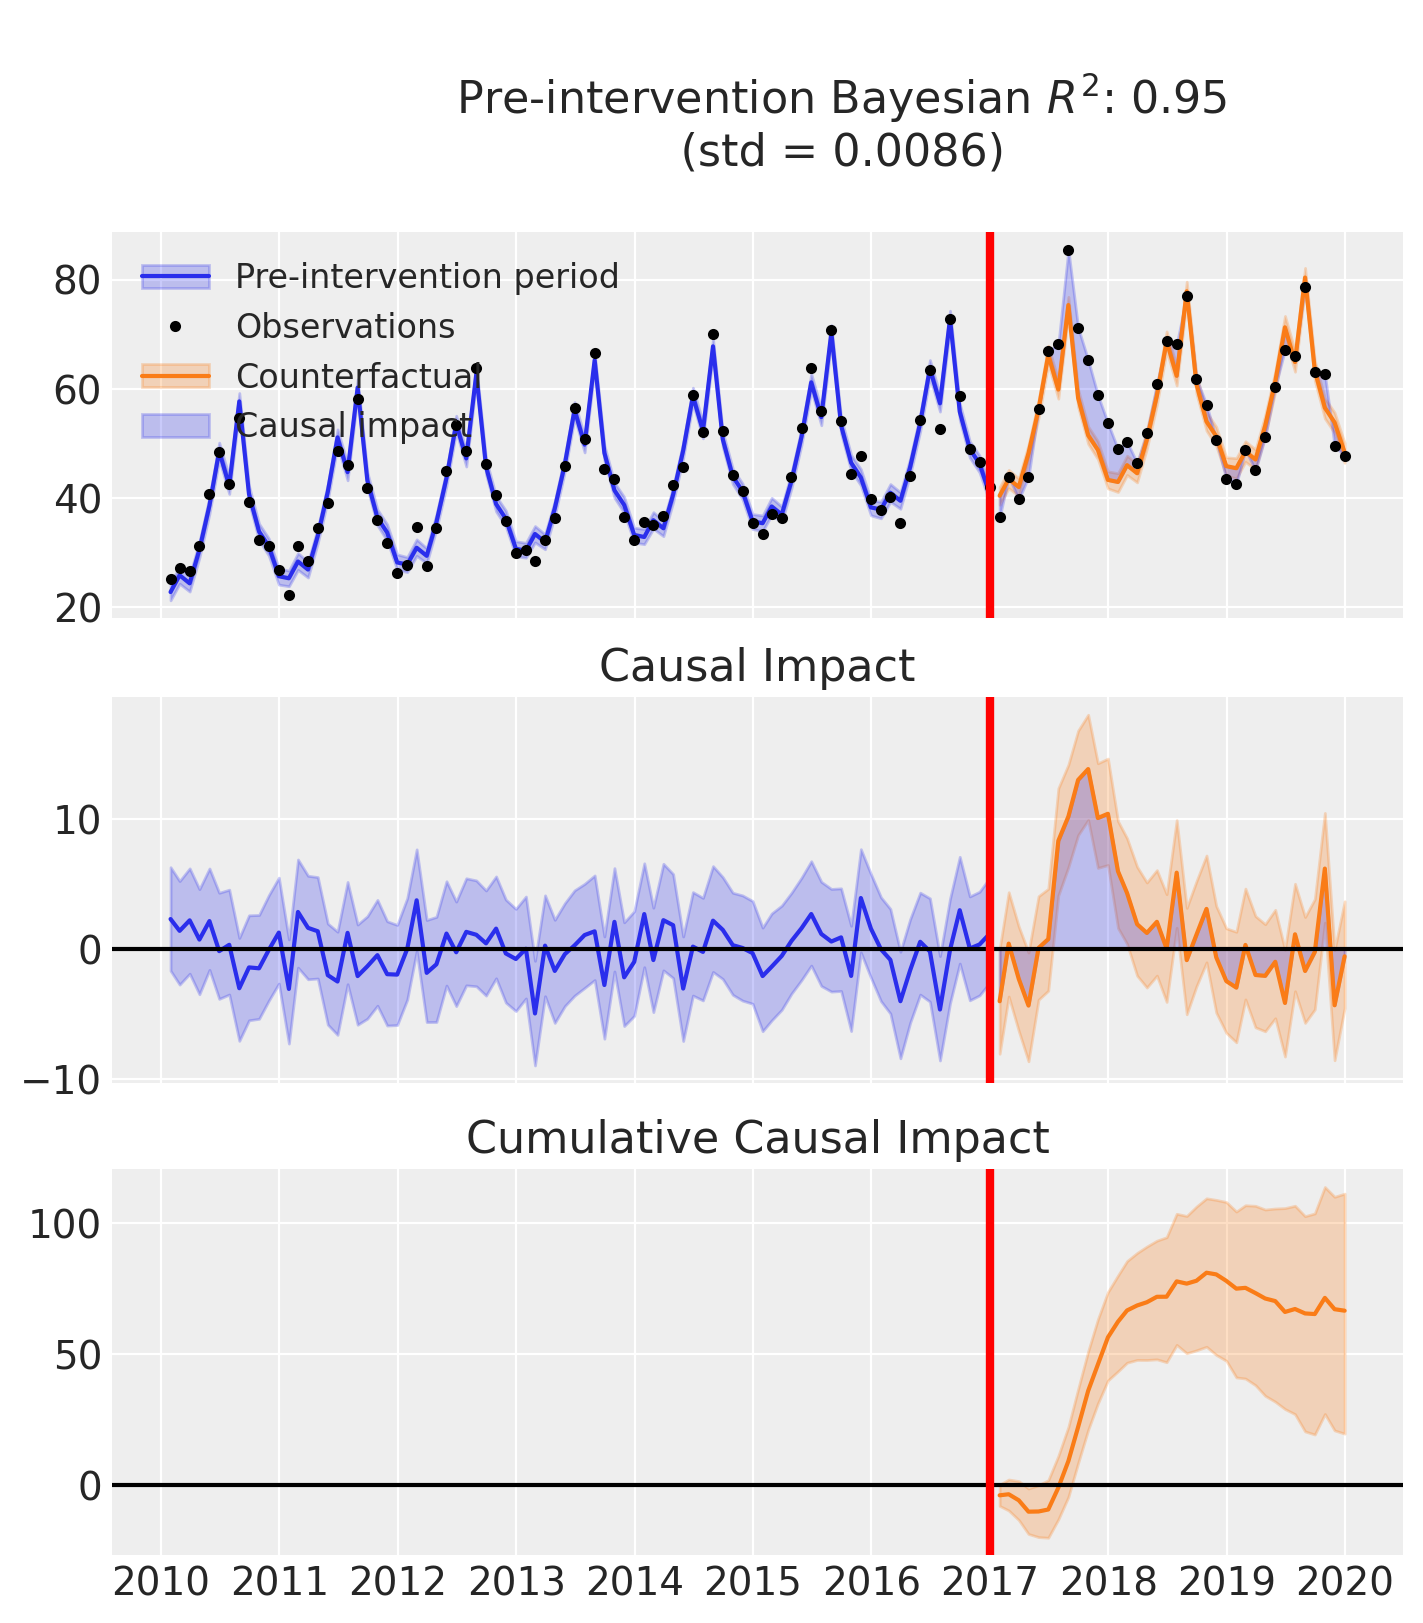

In [62]:
pymc_result.plot()

## OLS

In [63]:
ols_result = cp.InterruptedTimeSeries(
    df,
    treatment_time,
    formula="y ~ 1 + t + C(month)",
    model=cp.skl_models.LinearRegression(),
)

In [64]:
ols_result.summary()

==================================Pre-Post Fit==================================
Formula: y ~ 1 + t + C(month)
Model coefficients:
  Intercept     	         0
  C(month)[T.2] 	       2.9
  C(month)[T.3] 	       1.2
  C(month)[T.4] 	       7.1
  C(month)[T.5] 	        15
  C(month)[T.6] 	        25
  C(month)[T.7] 	        18
  C(month)[T.8] 	        33
  C(month)[T.9] 	        16
  C(month)[T.10]	       9.2
  C(month)[T.11]	       6.3
  C(month)[T.12]	      0.58
  t             	      0.21


In [65]:
ols_result.print_coefficients()

Model coefficients:
  Intercept     	         0
  C(month)[T.2] 	       2.9
  C(month)[T.3] 	       1.2
  C(month)[T.4] 	       7.1
  C(month)[T.5] 	        15
  C(month)[T.6] 	        25
  C(month)[T.7] 	        18
  C(month)[T.8] 	        33
  C(month)[T.9] 	        16
  C(month)[T.10]	       9.2
  C(month)[T.11]	       6.3
  C(month)[T.12]	      0.58
  t             	      0.21


ValueError: x and y must have same first dimension, but have shapes (36,) and (1296,)

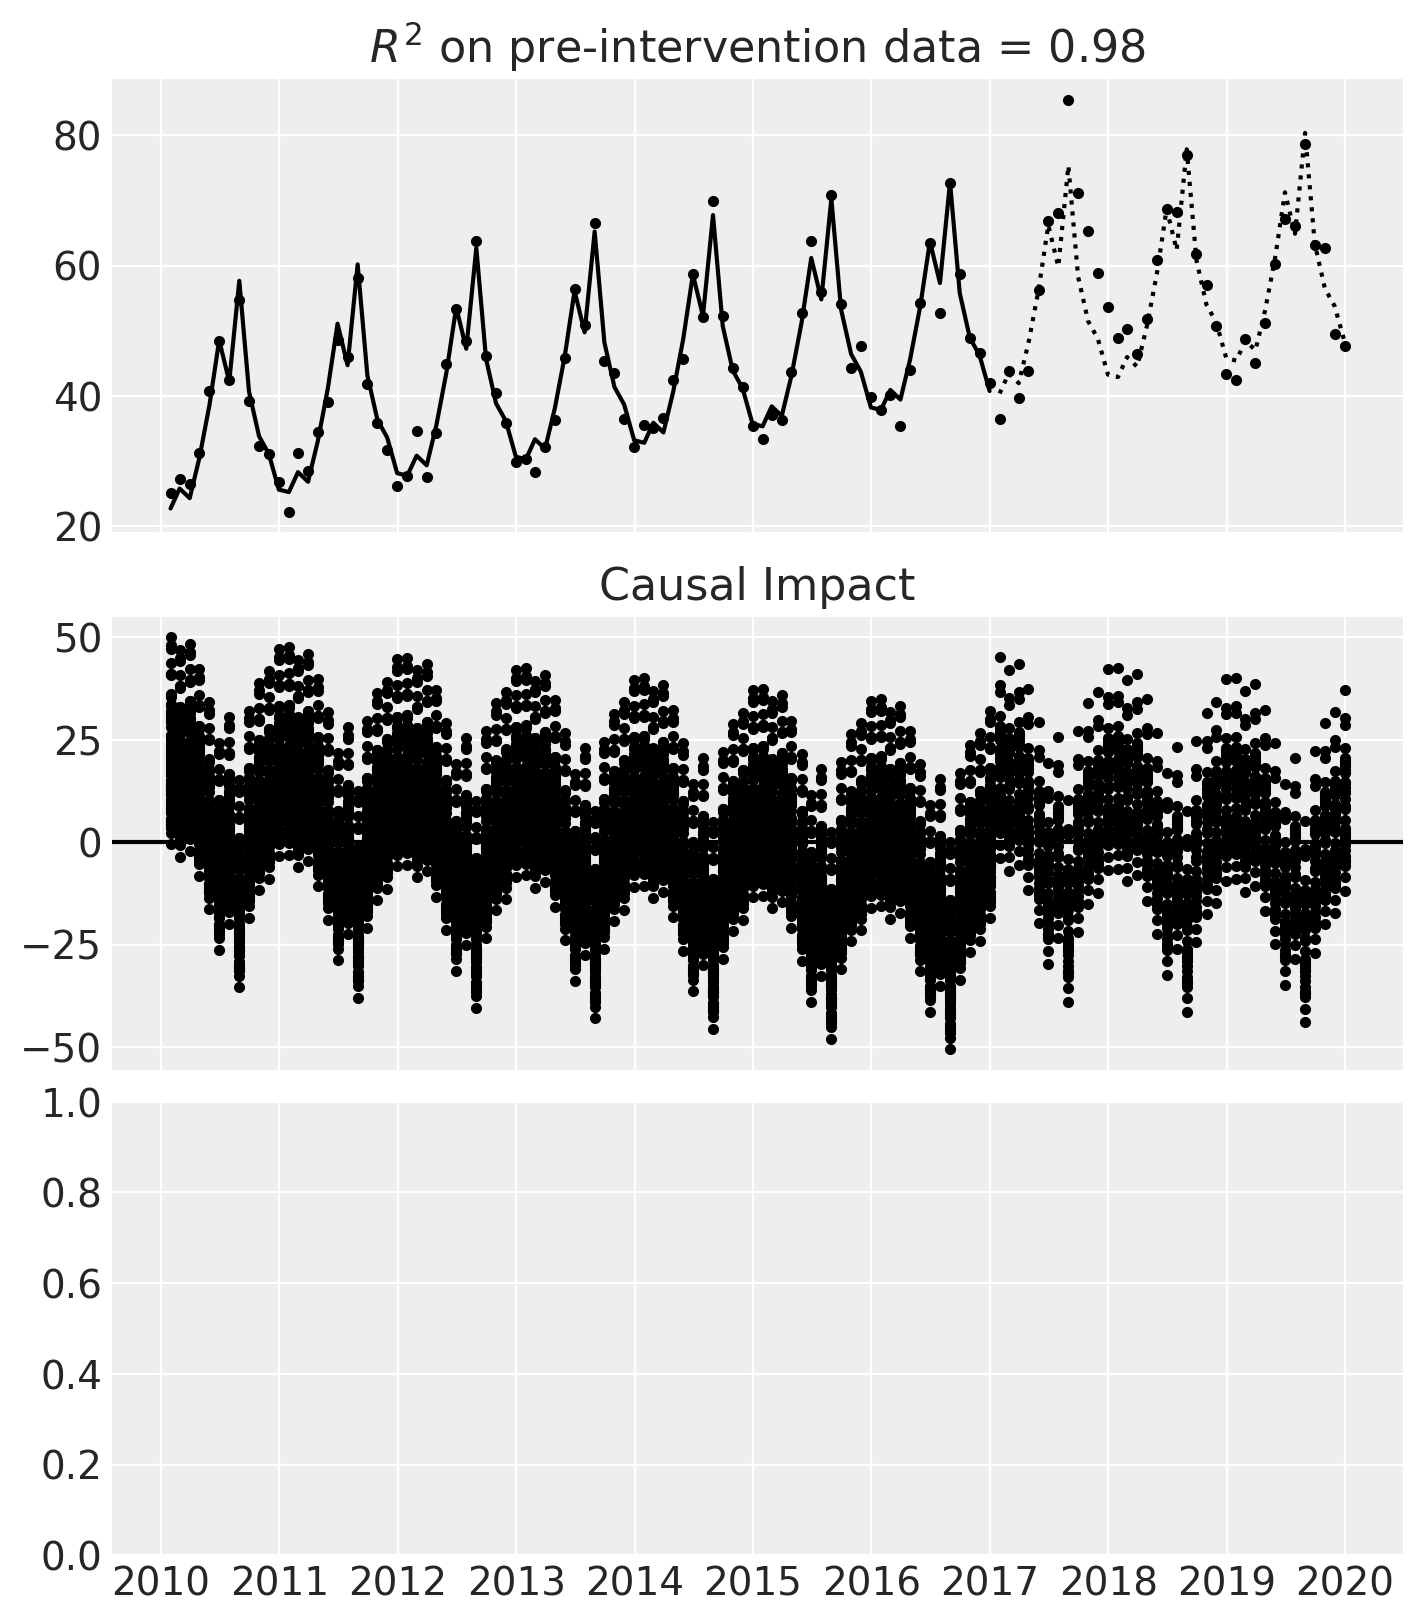

In [66]:
ols_result.plot()

# SC - refactored code

In [67]:
df = cp.load_data("sc")
treatment_time = 70

In [68]:
pymc_result = cp.SyntheticControl(
    df,
    treatment_time,
    formula="actual ~ 0 + a + b + c + d + e + f + g",
    model=cp.pymc_models.WeightedSumFitter(
        sample_kwargs={"target_accept": 0.95, "random_seed": seed}
    ),
)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.
Sampling: [beta, sigma, y_hat]
Sampling: [y_hat]
Sampling: [y_hat]
Sampling: [y_hat]
Sampling: [y_hat]


In [69]:
pymc_result.summary()

==================================Pre-Post Fit==================================
Formula: actual ~ 0 + a + b + c + d + e + f + g
Model coefficients:
    a      0.34, 94% HDI [0.3, 0.38]
    b      0.049, 94% HDI [0.01, 0.089]
    c      0.3, 94% HDI [0.26, 0.35]
    d      0.054, 94% HDI [0.01, 0.099]
    e      0.024, 94% HDI [0.0012, 0.066]
    f      0.19, 94% HDI [0.11, 0.26]
    g      0.039, 94% HDI [0.0029, 0.088]
    sigma  0.26, 94% HDI [0.22, 0.31]


In [70]:
pymc_result.print_coefficients()

Model coefficients:
    a      0.34, 94% HDI [0.3, 0.38]
    b      0.049, 94% HDI [0.01, 0.089]
    c      0.3, 94% HDI [0.26, 0.35]
    d      0.054, 94% HDI [0.01, 0.099]
    e      0.024, 94% HDI [0.0012, 0.066]
    f      0.19, 94% HDI [0.11, 0.26]
    g      0.039, 94% HDI [0.0029, 0.088]
    sigma  0.26, 94% HDI [0.22, 0.31]


(<Figure size 700x800 with 3 Axes>,
 array([<Axes: title={'center': '\n            Pre-intervention Bayesian $R^2$: 0.98\n            (std = 0.0029)\n            '}>,
        <Axes: title={'center': 'Causal Impact'}>,
        <Axes: title={'center': 'Cumulative Causal Impact'}>], dtype=object))

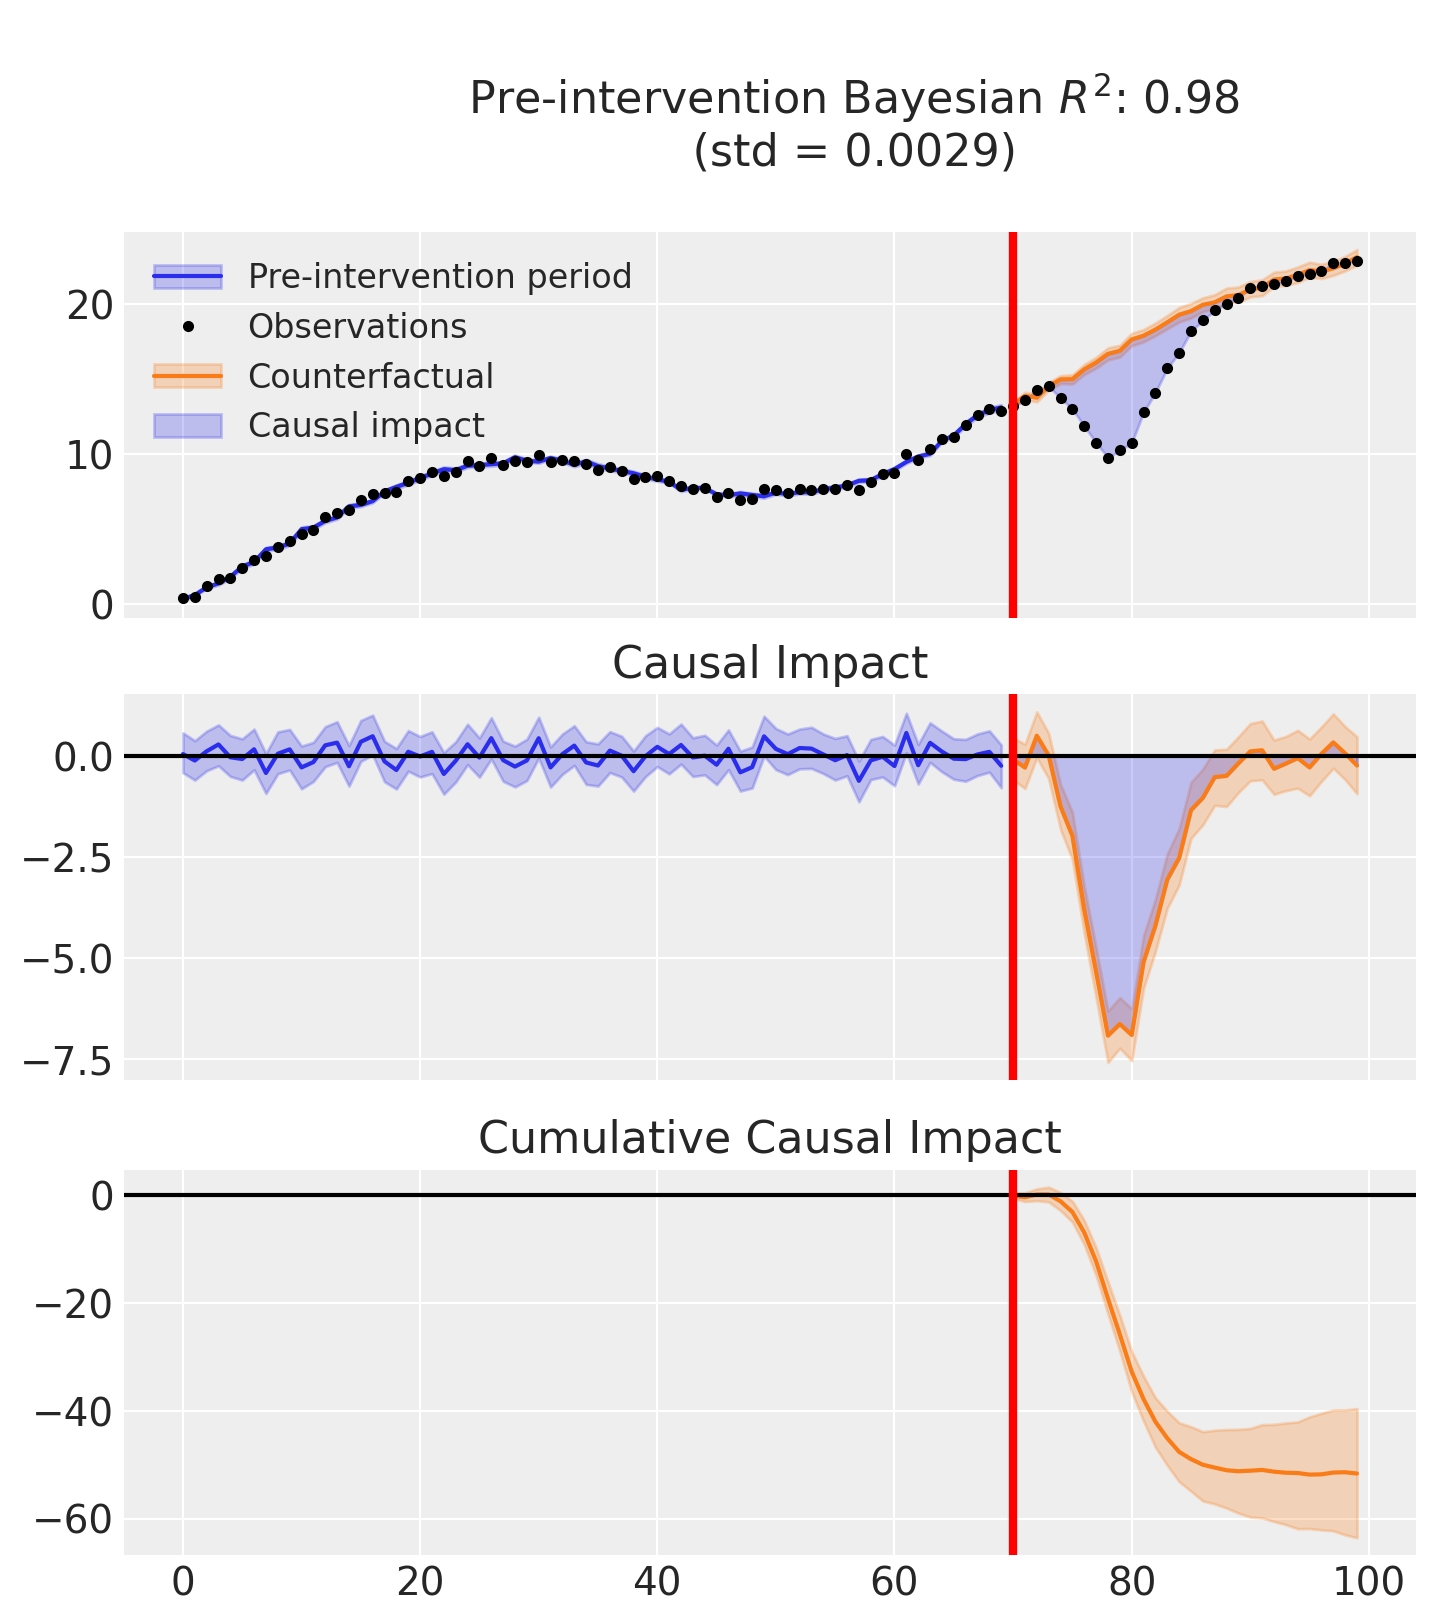

In [71]:
pymc_result.plot()

## OLS

In [72]:
# Note, we do not want an intercept in this model
ols_result = cp.SyntheticControl(
    df,
    treatment_time,
    formula="actual ~ 0 + a + b + c + d + e + f + g",
    model=cp.skl_models.WeightedProportion(),
)

In [73]:
ols_result.summary()

==================================Pre-Post Fit==================================
Formula: actual ~ 0 + a + b + c + d + e + f + g
Model coefficients:
  a	      0.38
  b	      0.17
  c	      0.44
  d	         0
  e	   5.4e-18
  f	         0
  g	         0


In [74]:
ols_result.print_coefficients()

Model coefficients:
  a	      0.38
  b	      0.17
  c	      0.44
  d	         0
  e	   5.4e-18
  f	         0
  g	         0


ValueError: x and y must have same first dimension, but have shapes (30,) and (900,)

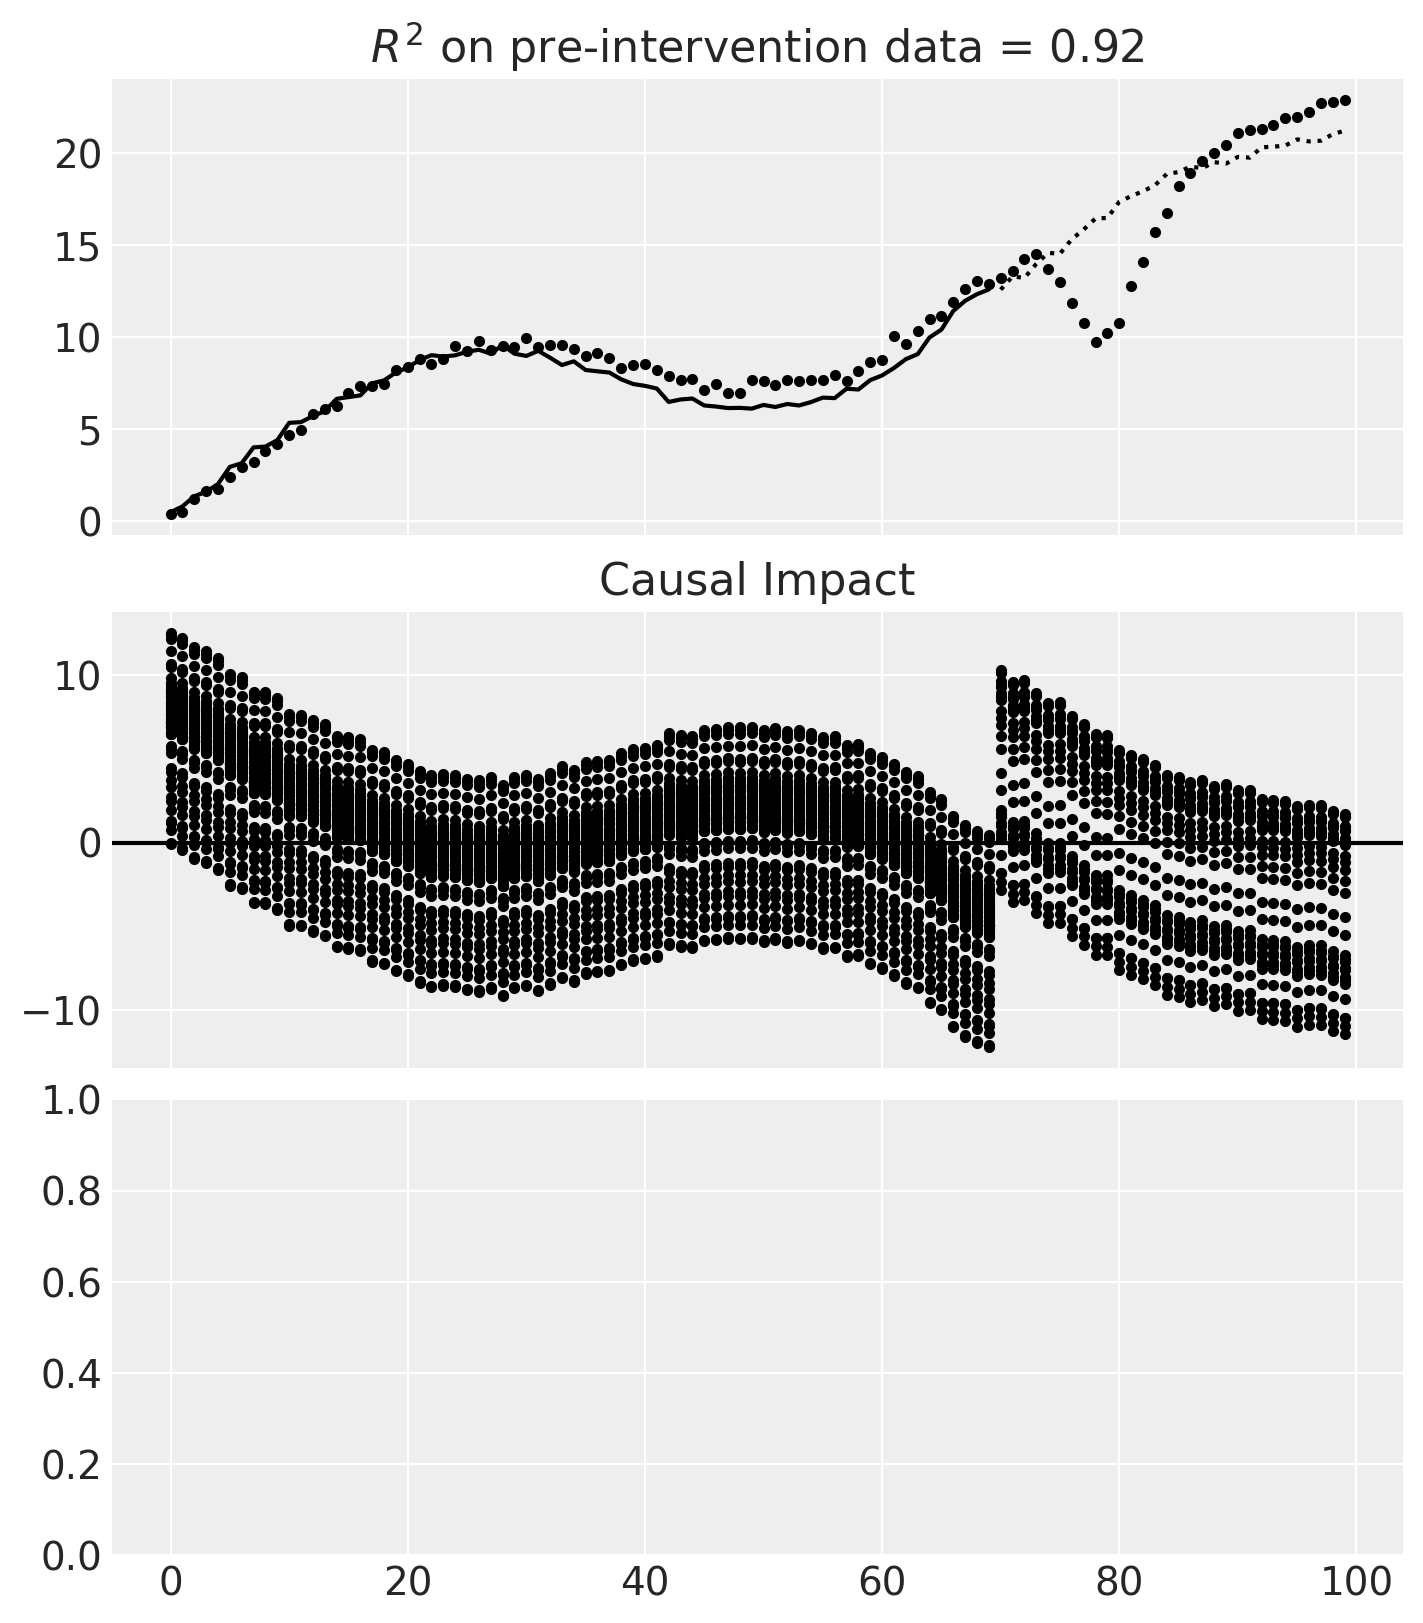

In [75]:
ols_result.plot()

# DiD - refactored code

In [88]:
df = cp.load_data("did")

In [89]:
result = cp.DifferenceInDifferences(
    df,
    formula="y ~ 1 + group*post_treatment",
    time_variable_name="t",
    group_variable_name="group",
    model=cp.pymc_models.LinearRegression(sample_kwargs={"random_seed": seed}),
)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
Sampling: [beta, sigma, y_hat]
Sampling: [y_hat]
Sampling: [y_hat]
Sampling: [y_hat]
Sampling: [y_hat]


In [90]:
result.summary()

===========================Difference in Differences============================
Formula: y ~ 1 + group*post_treatment

Results:
Causal impact = 0.5, $CI_{94\%}$[0.4, 0.6]
Model coefficients:
    Intercept                     1.1, 94% HDI [1, 1.1]
    post_treatment[T.True]        0.99, 94% HDI [0.92, 1.1]
    group                         0.16, 94% HDI [0.094, 0.23]
    group:post_treatment[T.True]  0.5, 94% HDI [0.4, 0.6]
    sigma                         0.082, 94% HDI [0.066, 0.1]


In [91]:
result.print_coefficients()

Model coefficients:
    Intercept                     1.1, 94% HDI [1, 1.1]
    post_treatment[T.True]        0.99, 94% HDI [0.92, 1.1]
    group                         0.16, 94% HDI [0.094, 0.23]
    group:post_treatment[T.True]  0.5, 94% HDI [0.4, 0.6]
    sigma                         0.082, 94% HDI [0.066, 0.1]


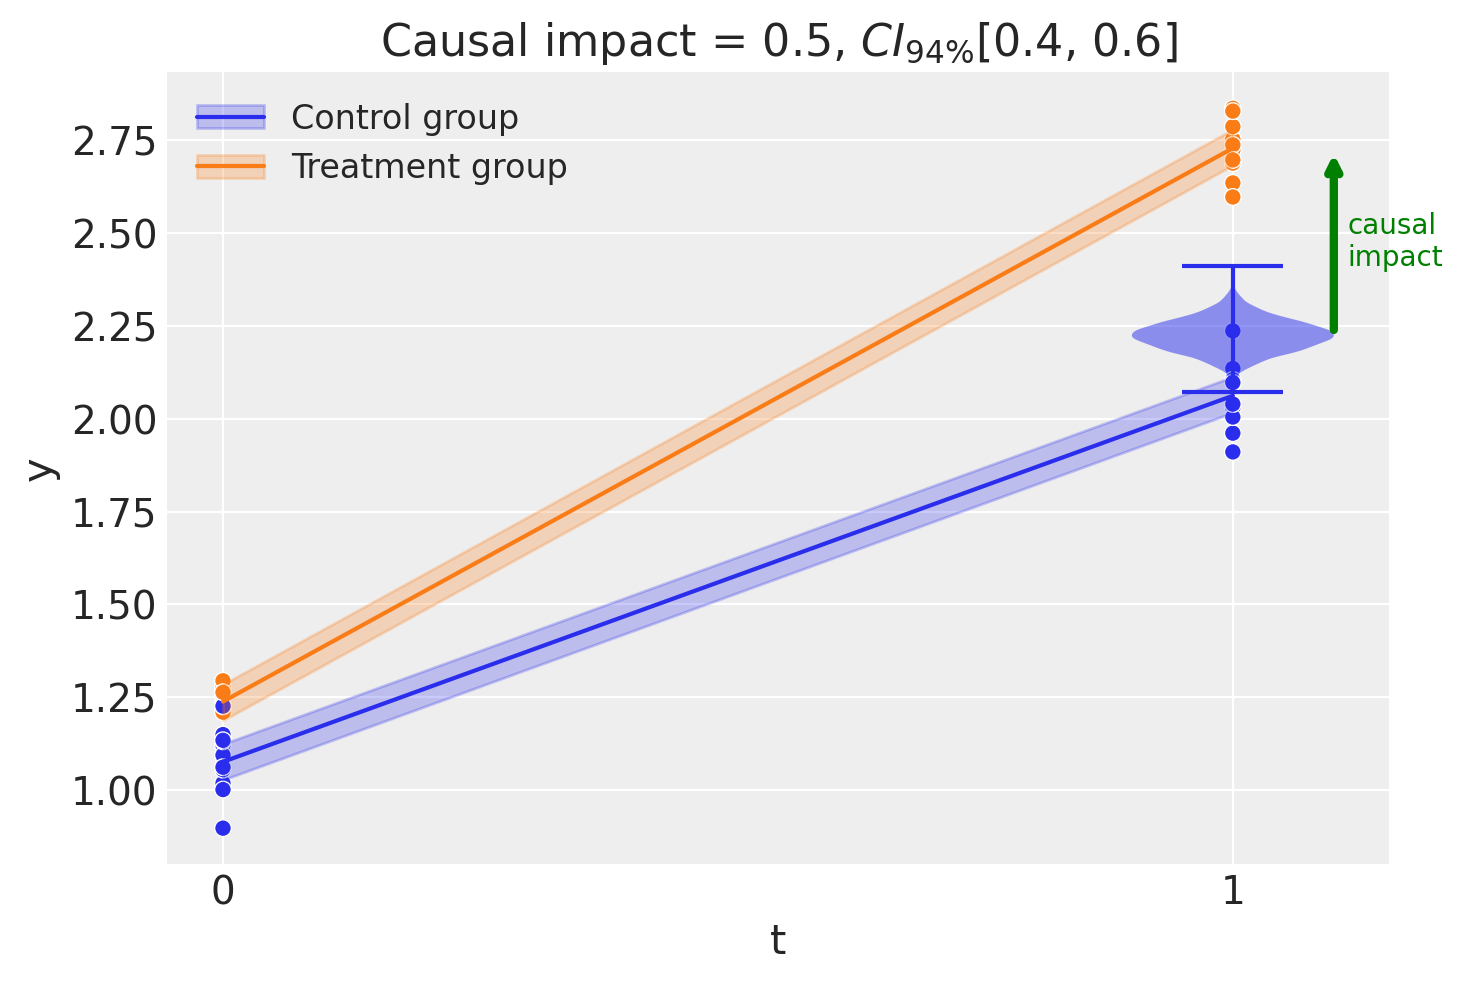

In [93]:
result.plot();

In [94]:
result = cp.DifferenceInDifferences(
    df,
    formula="y ~ 1 + group*post_treatment",
    time_variable_name="t",
    group_variable_name="group",
    treated=1,
    untreated=0,
    model=cp.skl_models.LinearRegression(),
)

In [95]:
result.summary()

===========================Difference in Differences============================
Formula: y ~ 1 + group*post_treatment

Results:


AttributeError: 'numpy.ndarray' object has no attribute 'quantile'

In [96]:
result.print_coefficients()

Model coefficients:
  Intercept                   	         0
  post_treatment[T.True]      	      0.99
  group                       	      0.16
  group:post_treatment[T.True]	       0.5


(<Figure size 720x480 with 1 Axes>,
 <Axes: title={'center': 'Causal impact = 0.5'}, xlabel='t', ylabel='y'>)

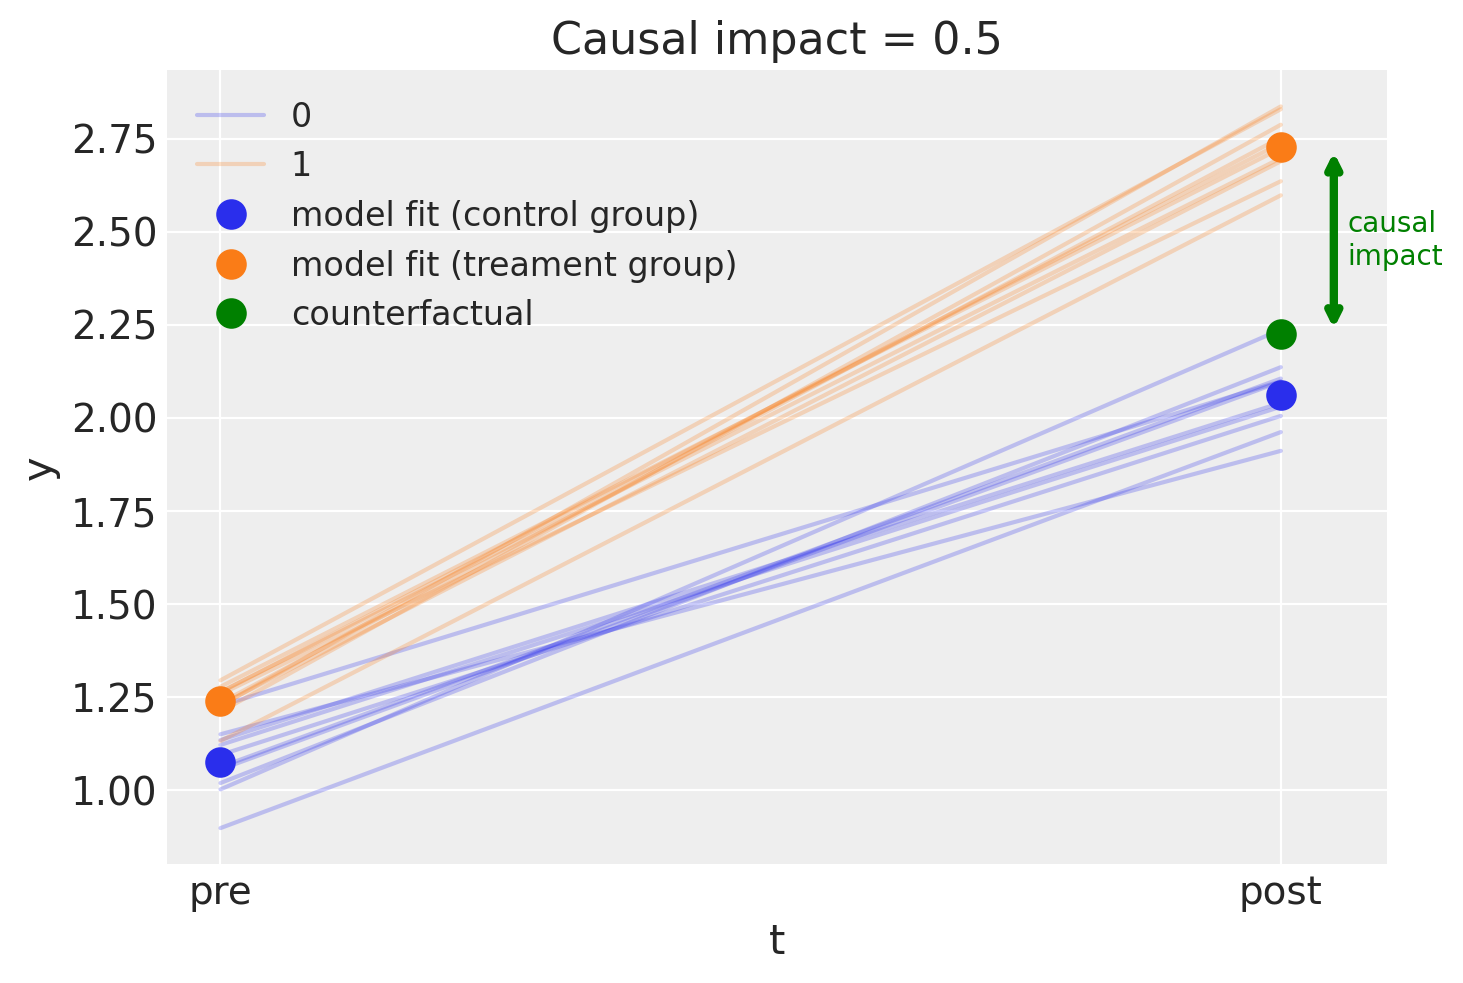

In [97]:
result.plot()

## ANOVA - Pre/Post NEGD

In [30]:
df = cp.load_data("anova1")

In [31]:
result = cp.PrePostNEGD(
    df,
    formula="post ~ 1 + C(group) + pre",
    group_variable_name="group",
    pretreatment_variable_name="pre",
    model=cp.pymc_models.LinearRegression(sample_kwargs={"random_seed": seed}),
)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
Sampling: [beta, sigma, y_hat]
Sampling: [y_hat]
Sampling: [y_hat]
Sampling: [y_hat]


In [32]:
result.summary()

==================Pretest/posttest Nonequivalent Group Design===================
Formula: post ~ 1 + C(group) + pre

Results:
Causal impact = 1.9, $CI_{94%}$[1.7, 2.1]
Model coefficients:
    Intercept      -0.48, 94% HDI [-1.2, 0.23]
    C(group)[T.1]  1.9, 94% HDI [1.7, 2.1]
    pre            1, 94% HDI [0.98, 1.1]
    sigma          0.51, 94% HDI [0.46, 0.56]


In [33]:
result.print_coefficients()

Model coefficients:
    Intercept      -0.48, 94% HDI [-1.2, 0.23]
    C(group)[T.1]  1.9, 94% HDI [1.7, 2.1]
    pre            1, 94% HDI [0.98, 1.1]
    sigma          0.51, 94% HDI [0.46, 0.56]


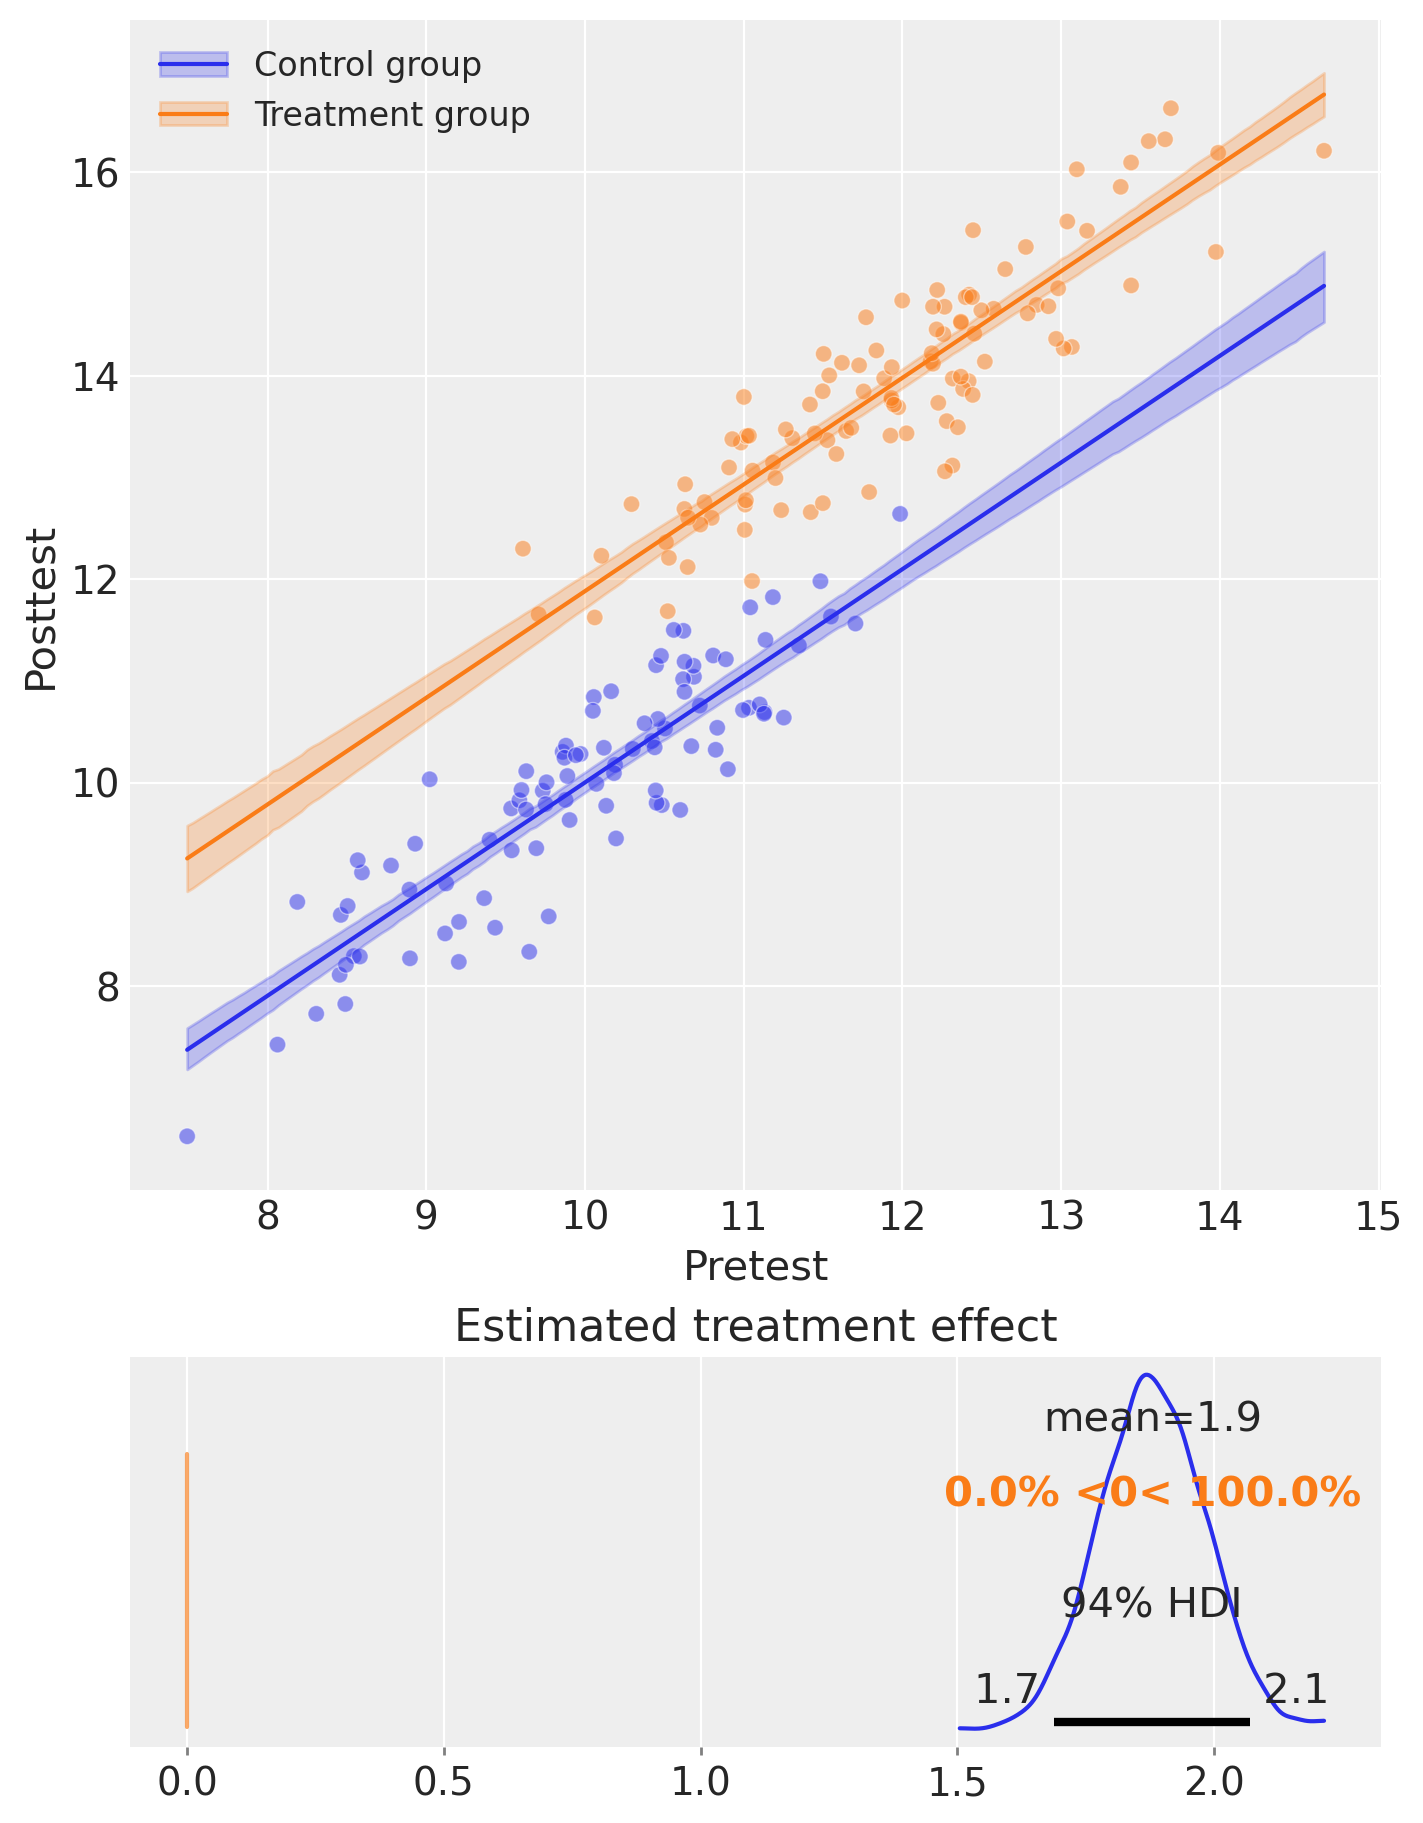

In [34]:
result.plot()

# Regression discontinuity

In [35]:
df = cp.load_data("rd")

### Bayesian

In [36]:
result = cp.RegressionDiscontinuity(
    df,
    formula="y ~ 1 + x + treated + x:treated",
    model=cp.pymc_models.LinearRegression(sample_kwargs={"random_seed": seed}),
    treatment_threshold=0.5,
)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
Sampling: [beta, sigma, y_hat]
Sampling: [y_hat]
Sampling: [y_hat]
Sampling: [y_hat]
Sampling: [y_hat]


In [37]:
result.discontinuity_at_threshold

<xarray.DataArray 'mu' (chain: 4, draw: 1000)> Size: 32kB
array([[0.82547319, 0.56242326, 0.56242326, ..., 0.89757565, 0.9366563 ,
        0.91790458],
       [1.32948341, 0.82979844, 0.84185008, ..., 1.12533177, 0.74736654,
        0.62713869],
       [0.80049032, 0.9962957 , 1.00851726, ..., 0.6561945 , 0.6561945 ,
        0.56378843],
       [0.91542755, 0.78336049, 0.92995961, ..., 1.5655875 , 1.07113216,
        1.2021246 ]])
Coordinates:
  * chain    (chain) int64 32B 0 1 2 3
  * draw     (draw) int64 8kB 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999

In [38]:
from causalpy.utils import convert_to_string

convert_to_string(result.discontinuity_at_threshold)

'0.91$CI_{94\\%}$[0.56, 1.3]'

In [39]:
result.summary()

Difference in Differences experiment
Formula: y ~ 1 + x + treated + x:treated
Running variable: x
Threshold on running variable: 0.5

Results:
Discontinuity at threshold = 0.91$CI_{94\%}$[0.56, 1.3]


Model coefficients:
    Intercept          0.085, 94% HDI [-0.00038, 0.17]
    treated[T.True]    2.5, 94% HDI [1.6, 3.3]
    x                  1.3, 94% HDI [1.1, 1.5]
    x:treated[T.True]  -3.1, 94% HDI [-4.2, -2]
    sigma              0.36, 94% HDI [0.31, 0.41]


In [40]:
result.print_coefficients()

Model coefficients:
    Intercept          0.085, 94% HDI [-0.00038, 0.17]
    treated[T.True]    2.5, 94% HDI [1.6, 3.3]
    x                  1.3, 94% HDI [1.1, 1.5]
    x:treated[T.True]  -3.1, 94% HDI [-4.2, -2]
    sigma              0.36, 94% HDI [0.31, 0.41]


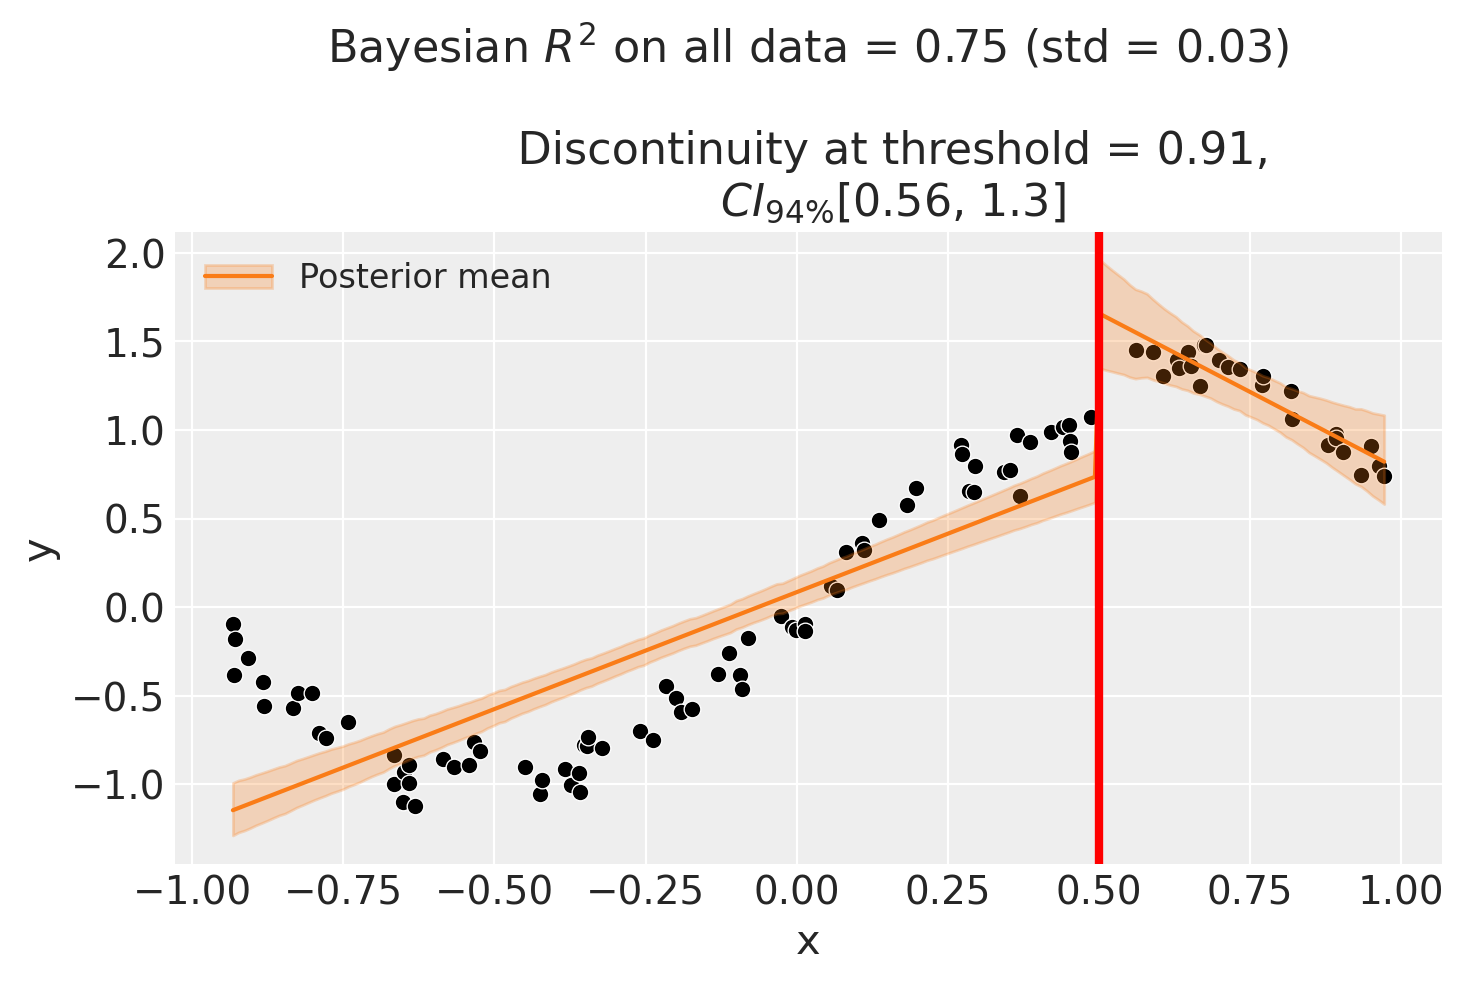

In [41]:
result.plot()

### OLS

In [42]:
result = cp.RegressionDiscontinuity(
    df,
    formula="y ~ 1 + x + treated + x:treated",
    model=cp.skl_models.LinearRegression(),
    treatment_threshold=0.5,
)

In [43]:
result.summary()

Difference in Differences experiment
Formula: y ~ 1 + x + treated + x:treated
Running variable: x
Threshold on running variable: 0.5

Results:
Discontinuity at threshold = 0.92


Model coefficients:
  Intercept        	         0
  treated[T.True]  	       2.5
  x                	       1.3
  x:treated[T.True]	      -3.1


In [44]:
result.print_coefficients()

Model coefficients:
  Intercept        	         0
  treated[T.True]  	       2.5
  x                	       1.3
  x:treated[T.True]	      -3.1


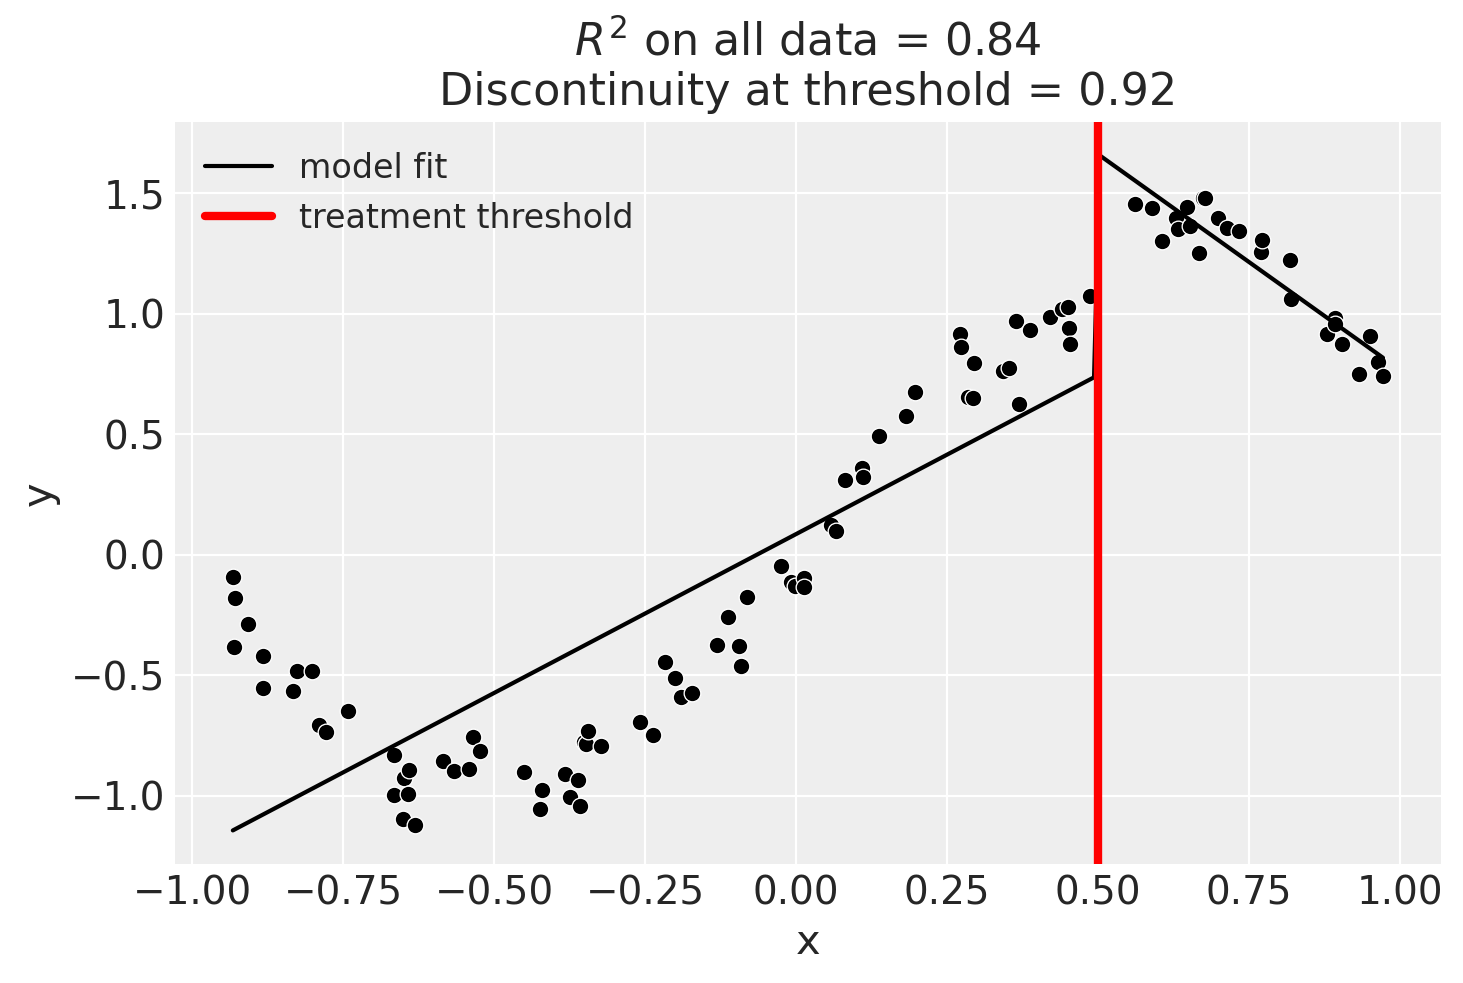

In [45]:
result.plot()

# Regression Kink

In [46]:
seed = 42
rng = np.random.default_rng(seed)


def f(x, beta, kink):
    return (
        beta[0]
        + beta[1] * x
        + beta[2] * x**2
        + beta[3] * (x - kink) * (x >= kink)
        + beta[4] * (x - kink) ** 2 * (x >= kink)
    )


def generate_data(beta, kink, sigma=0.05, N=50):
    if beta is None:
        beta = rng.random(5)
    x = rng.uniform(-1, 1, N)
    y = f(x, beta, kink) + rng.normal(0, sigma, N)
    df = pd.DataFrame({"x": x, "y": y, "treated": x >= kink})
    return df


kink = 0.5
# linear function with gradient change of 2 at kink point
beta = [0, -1, 0, 2, 0]
sigma = 0.05
df = generate_data(beta, kink, sigma=sigma)

In [47]:
result = cp.RegressionKink(
    df,
    formula=f"y ~ 1 + x + I((x-{kink})*treated)",
    model=cp.pymc_models.LinearRegression(sample_kwargs={"random_seed": seed}),
    kink_point=kink,
    epsilon=0.1,
)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
Sampling: [beta, sigma, y_hat]
Sampling: [y_hat]
Sampling: [y_hat]
Sampling: [y_hat]
Sampling: [y_hat]


In [48]:
result.summary()


        ================================Regression Kink=================================
        Formula: y ~ 1 + x + I((x-0.5)*treated)
        Running variable: x
        Kink point on running variable: 0.5

        Results:
        Change in slope at kink point = 1.9
        
Model coefficients:
    Intercept               -0.0053, 94% HDI [-0.018, 0.0075]
    x                       -0.99, 94% HDI [-1, -0.96]
    I((x - 0.5) * treated)  1.9, 94% HDI [1.8, 2.1]
    sigma                   0.04, 94% HDI [0.033, 0.048]


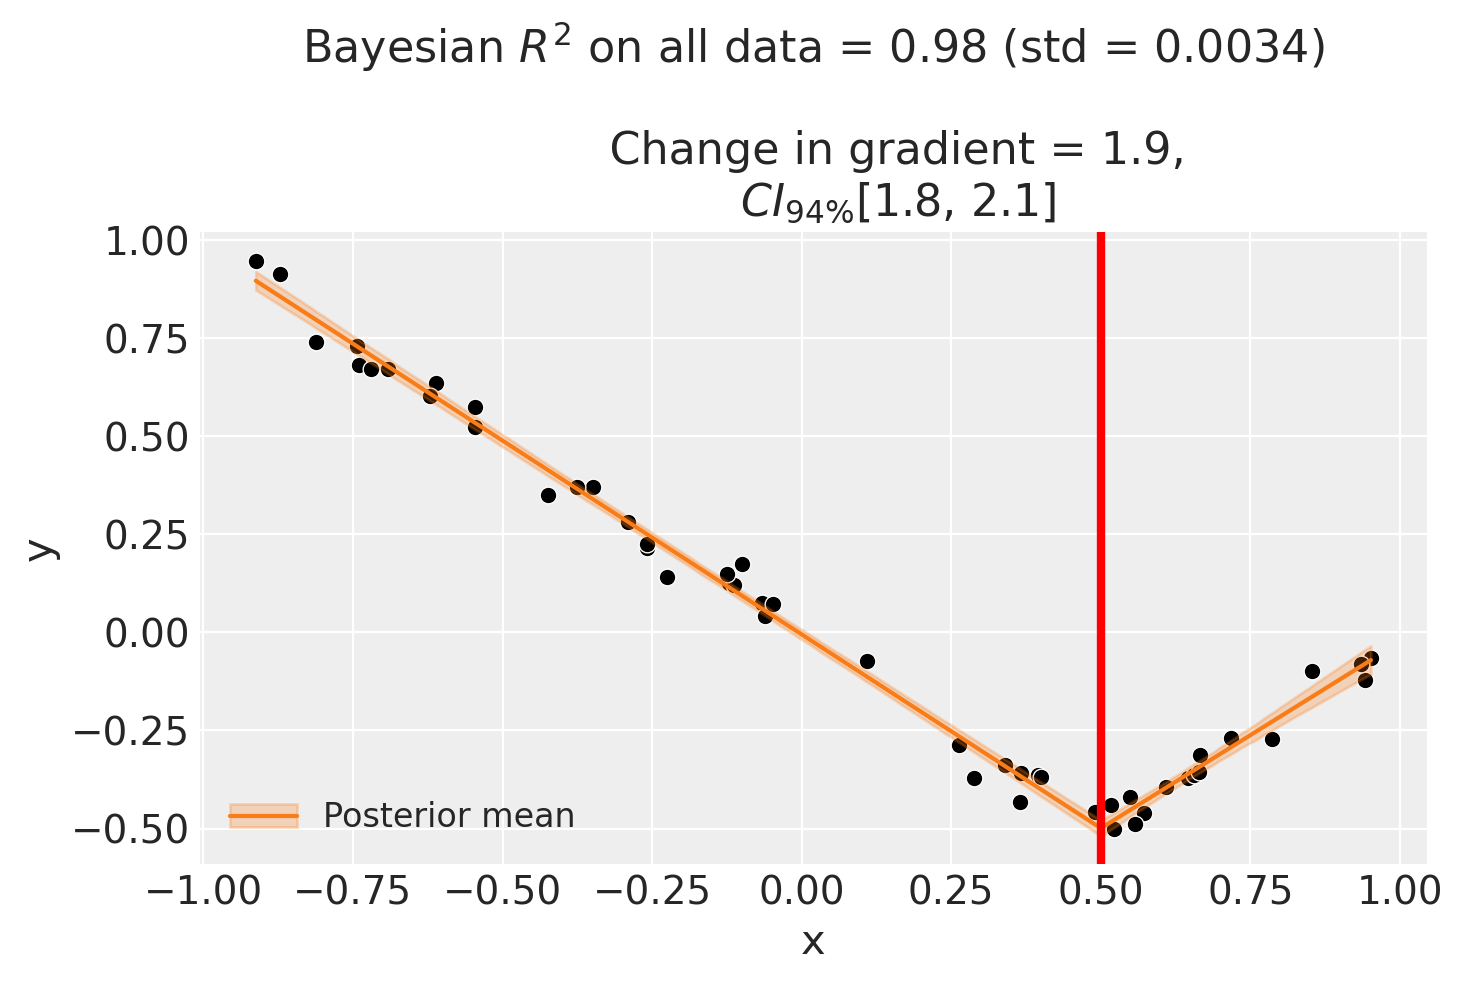

In [49]:
result.plot()

# Instrumental Variables

In [50]:
N = 100
e1 = np.random.normal(0, 3, N)
e2 = np.random.normal(0, 1, N)
Z = np.random.uniform(0, 1, N)
## Ensure the endogeneity of the the treatment variable
X = -1 + 4 * Z + e2 + 2 * e1
y = 2 + 3 * X + 3 * e1

test_data = pd.DataFrame({"y": y, "X": X, "Z": Z})

In [51]:
sample_kwargs = {
    "tune": 1000,
    "draws": 2000,
    "chains": 4,
    "cores": 4,
    "target_accept": 0.99,
}
instruments_formula = "X  ~ 1 + Z"
formula = "y ~  1 + X"
instruments_data = test_data[["X", "Z"]]
data = test_data[["y", "X"]]
iv = cp.InstrumentalVariable(
    instruments_data=instruments_data,
    data=data,
    instruments_formula=instruments_formula,
    formula=formula,
    model=cp.pymc_models.InstrumentalVariableRegression(sample_kwargs=sample_kwargs),
)

/Users/benjamv/git/CausalPy/causalpy/data_validation.py:143: UserWarning: Warning. The treatment variable is not Binary.
                This is not necessarily a problem but it violates
                the assumption of a simple IV experiment.
                The coefficients should be interpreted appropriately.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_t, beta_z, chol_cov]


Output()

/Users/benjamv/mambaforge/envs/CausalPy/lib/python3.11/site-packages/pytensor/compile/function/types.py:970: RuntimeWarning: invalid value encountered in accumulate
  self.vm()


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 38 seconds.


# Inverse propensity score weighting

In [52]:
df1 = pd.DataFrame(
    np.random.multivariate_normal([0.5, 1], [[2, 1], [1, 1]], size=10000),
    columns=["x1", "x2"],
)
df1["trt"] = np.where(
    -0.5 + 0.25 * df1["x1"] + 0.75 * df1["x2"] + np.random.normal(0, 1, size=10000) > 0,
    1,
    0,
)
TREATMENT_EFFECT = 2
df1["outcome"] = (
    TREATMENT_EFFECT * df1["trt"]
    + df1["x1"]
    + df1["x2"]
    + np.random.normal(0, 1, size=10000)
)

In [53]:
seed = 42
result = cp.InversePropensityWeighting(
    df1,
    formula="trt ~ 1 + x1 + x2",
    outcome_variable="outcome",
    weighting_scheme="robust",
    model=cp.pymc_models.PropensityScore(
        sample_kwargs={
            "draws": 1000,
            "target_accept": 0.95,
            "random_seed": seed,
            "progressbar": False,
        },
    ),
)

/Users/benjamv/mambaforge/envs/CausalPy/lib/python3.11/site-packages/pymc/data.py:304: FutureWarning: MutableData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b]
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.
Sampling: [b, t_pred]
Sampling: [t_pred]


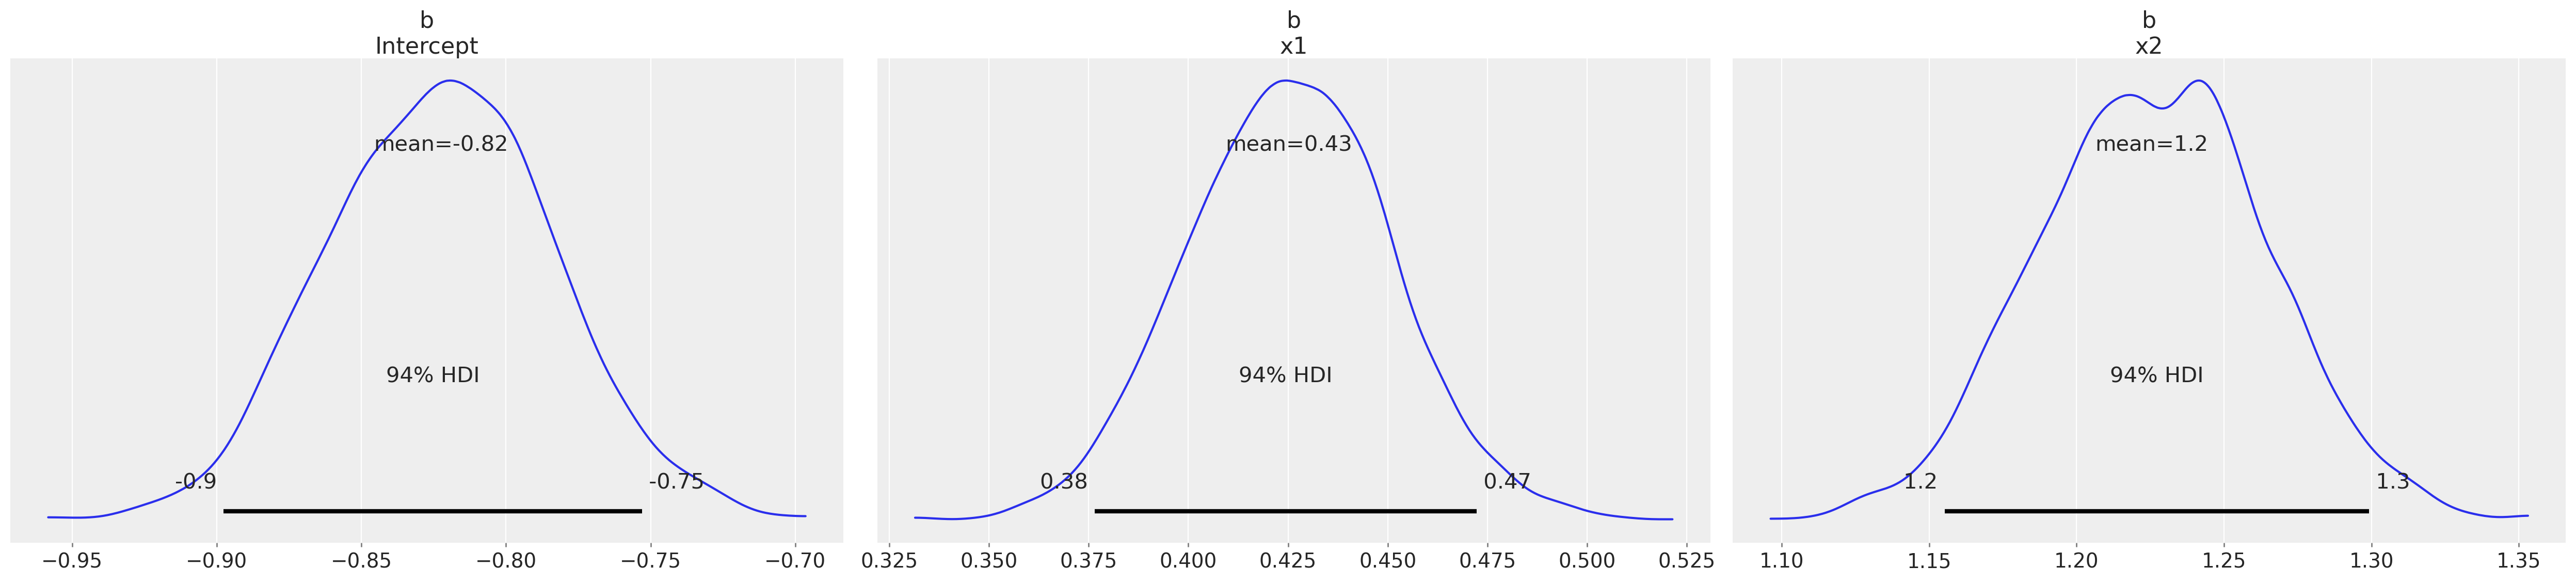

In [54]:
az.plot_posterior(result.model.idata, var_names=["b"]);

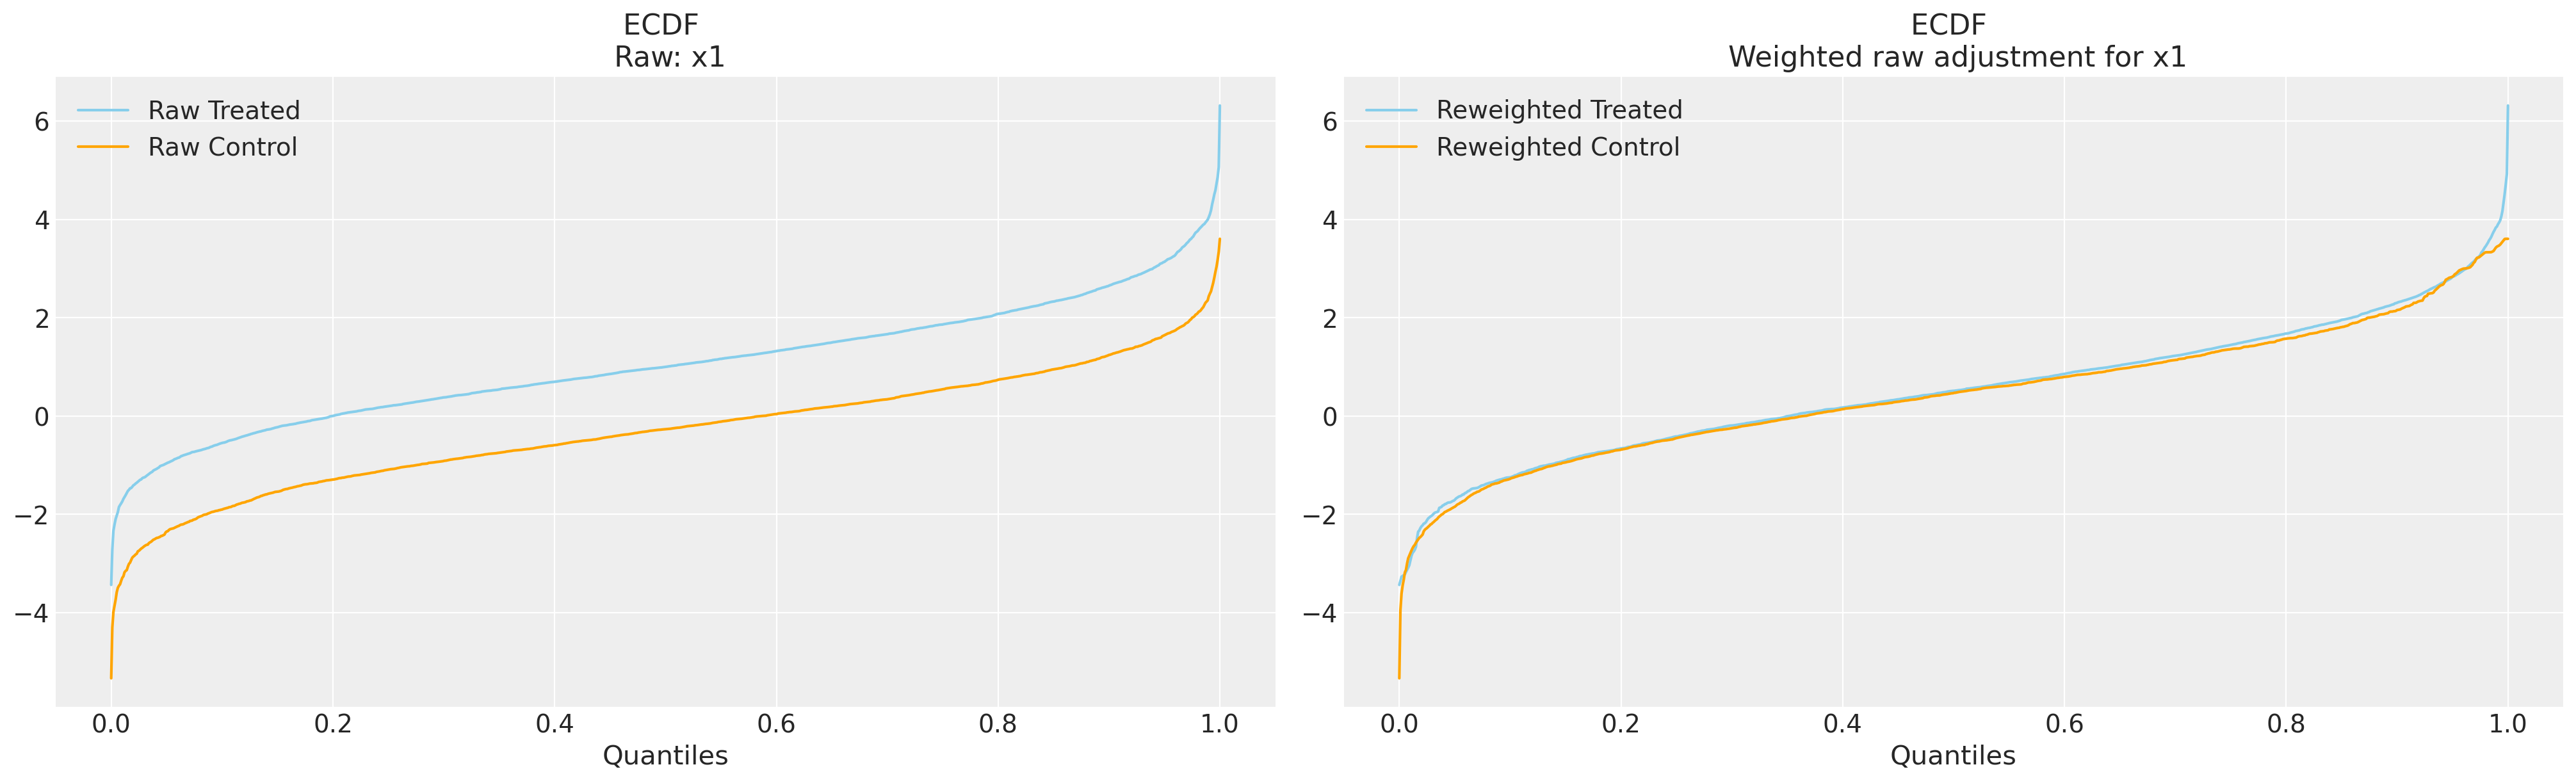

In [55]:
result.plot_balance_ecdf("x1", weighting_scheme="raw");